In [4]:
from collections import Counter
import matplotlib.pyplot as plt

The function opens the log files, combines all the relevant data into a dictionary:

In [5]:
def calculate_stats():
    turns = 0
    fields = ['card1', 'card2', 'chooser', 'metric', 
              'value1', 'value2', 'div1', 'div2', 
              'winner', 'game_starter', 'game_winner',
             'winner_card', 'winner_metric', 'card_wins', 'turns']
    info = {field: [] for field in fields}
    for i in range(1, 101):
        with open('game_' + str(i) + '.csv', 'r', encoding='utf-8') as f:
            content = f.readlines()
        stats = content[1:]
        info['game_starter'].append(int(content[1].split(',')[-1]))
        info['game_winner'].append(int(content[-1].split(',')[-1]))
        if info['game_winner'][-1] == 1:
            info['winner_card'].append(content[-1].split(',')[1])
        else:
            info['winner_card'].append(content[-1].split(',')[2])
        info['winner_metric'].append(content[-1].split(',')[4])
        info['turns'].append(len(stats))
        for stat in stats:
            data = stat.split(',')[1:]
            for i, field in enumerate(data):
                info[fields[i]].append(field.strip('\n'))
            if int(info['winner'][-1]) == 1:
                info['card_wins'].append(info['card1'][-1])
            else:
                info['card_wins'].append(info['card2'][-1])
        turns += len(stats)
    return info

info = calculate_stats()

**The following statistics are calculated:**
winning turns per card, winning final turns per card; usage per metric, winning final turns per metric; maximal, minimal and average number of turns per game.

In [6]:
card_wins = Counter(info['card_wins'])
cw_count = card_wins.most_common()
print(cw_count, '\n')
winner_cards = Counter(info['winner_card'])
wc_count = winner_cards.most_common()
print(wc_count, '\n')

metrics = Counter(info['metric'])
winner_metrics = Counter(info['winner_metric'])
m_count = metrics.most_common()
print(m_count, '\n')
wm_count = winner_metrics.most_common()
print(wm_count, '\n')

turns = [max(info['turns']), min(info['turns']), sum(info['turns'])/100]
print(', '.join([str(turn) for turn in turns]))

[('27;strindberg-miss-julie;3;1;1;1;1;2', 463), ('20;grabbe-napoleon-or-the-hundred-days;259;6;0.09;0.96;2.83;106', 457), ('32;beckett-waiting-for-godot;5;2;0.8;0.87;1.2;4', 438), ('22;madach-the-tragedy-of-man;103;3;0.23;0.97;1.78;99', 389), ('16;goethe-faust-part-one;115;3;0.2;0.98;1.7;67', 384), ('25;caragiale-a-lost-letter;17;3;0.73;0.91;1.28;15', 381), ('30;chekhov-the-cherry-orchard;14;2;0.73;0.86;1.28;12', 374), ('10;moliere-the-miser;13;2;0.62;0.83;1.39;12', 363), ('12;goldoni-the-servant-of-two-masters;13;3;0.59;0.87;1.42;11', 356), ('14;tieck-puss-in-boots;48;3;0.45;0.87;1.61;43', 352), ('13;goethe-gotz-von-berlichingen-with-the-iron-hand;79;5;0.09;0.87;2.49;46', 349), ('5;marlowe-doctor-faustus-quarto-of-1616;46;4;0.16;0.91;1.91;42', 330), ('1;aeschylus-the-persians;6;2;0.53;0.76;1.47;5', 321), ('17;pushkin-boris-godunov;79;6;0.11;0.92;3.03;29', 311), ('11;behn-the-rover-parts-one-and-two;43;3;0.38;0.84;1.62;41', 296), ('28;galdos-electra;15;3;0.53;0.85;1.48;13', 294), ('29;

Plots built for the calculated data.  
**Winning turns per card**

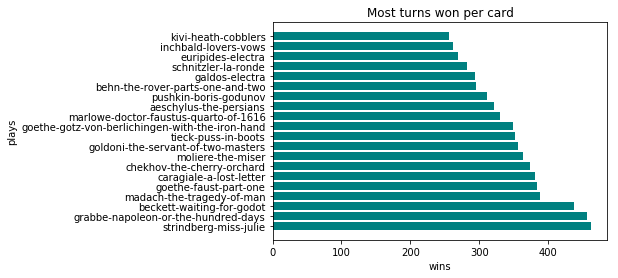

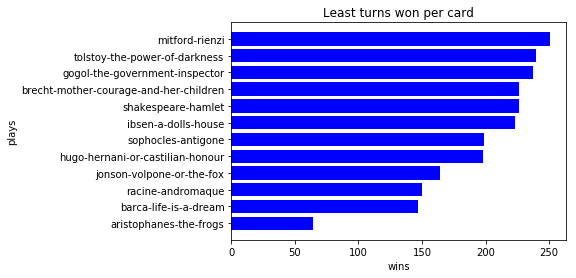

In [11]:
cw_divisions = [cw[0].split(';')[1] for cw in cw_count[:20]]
cw_marks = [cw[1] for cw in cw_count[:20]]
plt.barh(cw_divisions, cw_marks, color='teal')
plt.title('Most turns won per card')
plt.xlabel('wins')
plt.ylabel('plays')
plt.show()

cw_divisions = [cw[0].split(';')[1] for cw in cw_count[:19:-1]]
cw_marks = [cw[1] for cw in cw_count[:19:-1]]
plt.barh(cw_divisions, cw_marks, color='blue')
plt.title('Least turns won per card')
plt.xlabel('wins')
plt.ylabel('plays')
plt.show()

**Final turns won per card**

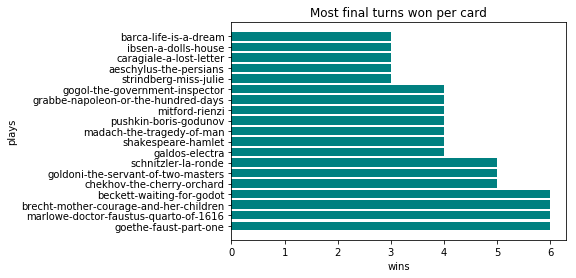

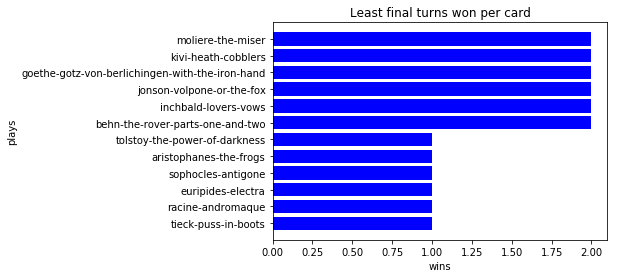

In [13]:
wc_divisions = [wc[0].split(';')[1] for wc in wc_count[:19]]
wc_marks = [wc[1] for wc in wc_count[:19]]
plt.barh(wc_divisions, wc_marks, color='teal')
plt.title('Most final turns won per card')
plt.xlabel('wins')
plt.ylabel('plays')
plt.show()

wc_divisions = [wc[0].split(';')[1] for wc in wc_count[:18:-1]]
wc_marks = [wc[1] for wc in wc_count[:18:-1]]
plt.barh(wc_divisions, wc_marks, color='blue')
plt.title('Least final turns won per card')
plt.xlabel('wins')
plt.ylabel('plays')
plt.show()

**Usage per metric 
Final turns won per metric**

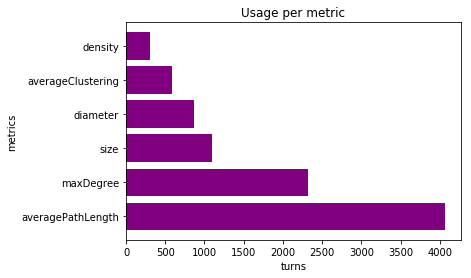

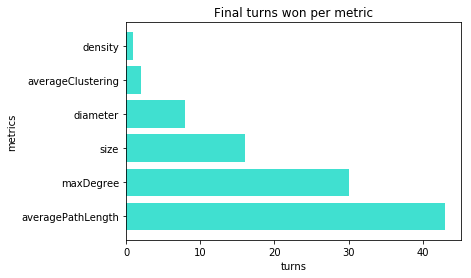

In [9]:
m_divisions = [m[0] for m in m_count]
m_marks = [m[1] for m in m_count]
plt.barh(m_divisions, m_marks, color='purple')
plt.title('Usage per metric')
plt.xlabel('turns')
plt.ylabel('metrics')
plt.show()

wm_divisions = [wm[0] for wm in wm_count]
wm_marks = [wm[1] for wm in wm_count]
plt.barh(wm_divisions, wm_marks, color='turquoise')
plt.title('Final turns won per metric')
plt.xlabel('turns')
plt.ylabel('metrics')
plt.show()

**Maximal, minimal and average number of turns per game**

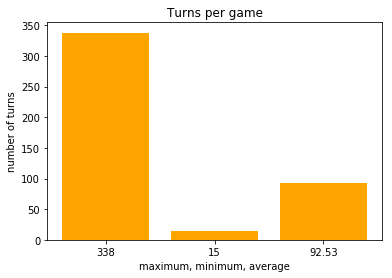

In [10]:
turn_divisions = [str(turn) for turn in turns]
turn_marks = turns
plt.bar(turn_divisions, turn_marks, color='orange')
plt.title('Turns per game')
plt.xlabel('maximum, minimum, average')
plt.ylabel('number of turns')
plt.show()